In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = yf.download("AAPL",start='2011-01-01')
data.columns = data.columns.droplevel(1)
data.reset_index(inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2011-01-03,9.928854,9.949641,9.786355,9.810456,445138400
1,2011-01-04,9.980666,10.017119,9.886068,10.015311,309080800
2,2011-01-05,10.062309,10.072553,9.926739,9.928246,255519600
3,2011-01-06,10.054180,10.099972,10.029175,10.084005,300428800
4,2011-01-07,10.126184,10.133113,9.999049,10.062014,311931200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3538 non-null   datetime64[ns]
 1   Close   3538 non-null   float64       
 2   High    3538 non-null   float64       
 3   Low     3538 non-null   float64       
 4   Open    3538 non-null   float64       
 5   Volume  3538 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 166.0 KB


In [51]:
data.describe()

Price,Date,Close,High,Low,Open,Volume
count,3537,3537.000000,3537.000000,3537.000000,3537.000000,3.537000e+03
mean,2018-01-11 15:05:26.717556992,72.560080,73.265302,71.783245,72.504498,2.028614e+08
min,2011-01-03 00:00:00,9.499548,9.571250,9.354337,9.540519,2.323470e+07
25%,2014-07-10 00:00:00,20.951538,21.110396,20.761791,20.958158,8.210040e+07
50%,2018-01-11 00:00:00,39.406391,39.905358,38.946347,39.399182,1.301656e+08
75%,2021-07-19 00:00:00,133.534164,134.692019,131.531403,133.216383,2.610836e+08
max,2025-01-24 00:00:00,259.019989,260.100006,257.630005,258.190002,1.880998e+09
std,NaN,66.639008,67.261954,65.932231,66.572286,1.887043e+08


In [4]:
fig = px.line(data,x=data['Date'],y=['Open','Close','High','Low'])
fig.show()

## Statstical Analysis

In [8]:
from scipy import stats
import numpy as np

In [9]:

def calculate_returns(stock_data):

    returns = np.log(stock_data['Close'] / stock_data['Close'].shift(1)).dropna()
    return returns

def normality_test(returns):

    # Shapiro-Wilk Test
    shapiro_test = stats.shapiro(returns)

    return {
        'Shapiro-Wilk': {
            'statistic': shapiro_test.statistic,
            'p_value': shapiro_test.pvalue
        }
    }

def calculate_var(returns, confidence=0.95):

    var = np.percentile(returns, (1 - confidence) * 100)
    return var

def stock_data_analysis(stock_data):


    returns = calculate_returns(stock_data)
    print("return \n",returns,end='\n')
    print("-"*100)

    normality_results = normality_test(returns)
    print('normality_test \n',normality_results,end='\n')
    print("-"*100)



    var_95 = calculate_var(returns, 0.95)
    print("value_at_risk \n" ,var_95,end='\n')
    print("-"*100)


    descriptive_stats = {
        'Mean Return': np.mean(returns),
        'Standard Deviation': np.std(returns),
        'Skewness': stats.skew(returns),
        'Kurtosis': stats.kurtosis(returns)
    }
    print("descriptive_stats \n" , descriptive_stats)
    print("-"*100)

    plt.figure(figsize=(10, 6))
    plt.hist(returns,bins=50,density=True)
    plt.title('Returns Distribution')
    plt.xlabel('Returns')
    plt.ylabel('Density')
    plt.show()


return 
 1       0.005205
2       0.008147
3      -0.000808
4       0.007136
5       0.018657
          ...   
3533   -0.032436
3534    0.005331
3535   -0.000760
3536   -0.003942
3537    0.031286
Name: Close, Length: 3537, dtype: float64
----------------------------------------------------------------------------------------------------
normality_test 
 {'Shapiro-Wilk': {'statistic': 0.9436929850043667, 'p_value': 9.324396447107378e-35}}
----------------------------------------------------------------------------------------------------
value_at_risk 
 -0.026867645154974355
----------------------------------------------------------------------------------------------------
descriptive_stats 
 {'Mean Return': 0.0008883306101773321, 'Standard Deviation': 0.017616315403562066, 'Skewness': -0.2533934925366597, 'Kurtosis': 5.607191348222182}
----------------------------------------------------------------------------------------------------


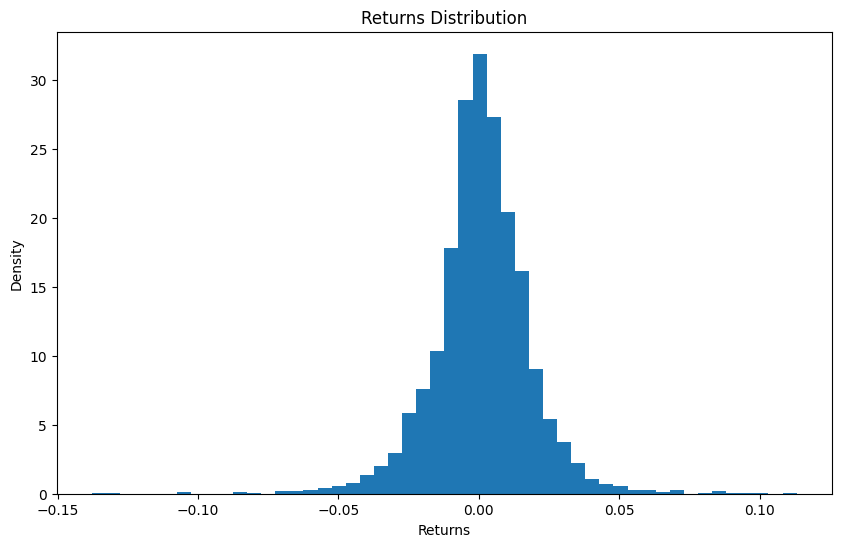

In [10]:
stock_data_analysis(data)

### data prep. for model training

In [11]:
dataset = data['Close'].values

test_data_len = int(len(dataset) * 0.2)
if test_data_len > 200:
    test_data_len = min(test_data_len,300)
train_data_len = len(dataset) - test_data_len

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset.reshape(-1,1))

In [17]:
train_data = scaled_data[0:train_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [18]:
x_train.shape
y_train.shape

(3138,)

In [19]:
test_data = scaled_data[train_data_len - 100: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[train_data_len:]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])


# Convert the data to a numpy array
x_test_arr = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test_arr, (x_test_arr.shape[0], x_test_arr.shape[1], 1 ))

In [23]:
x_test.shape
y_test.shape

(300,)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L2

# Hyperparameter adjustments
epochs = 7 # Increase epochs for more training
batch_size = 32  # Experiment with different batch sizes
learning_rate = 0.001  # Adjust learning rate

# Build the LSTM model
model = Sequential()

# Compile the model with an optimizer, loss function, and metrics

model.add(LSTM(128, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_regularizer=L2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [70]:
model.compile(optimizer='adam', loss='mse',)

model.fit(x_train, y_train,
          batch_size=16, epochs=10)

Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 66s 310ms/step - loss: 0.4744
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 83s 315ms/step - loss: 0.0042
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 80s 304ms/step - loss: 0.0025
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 83s 309ms/step - loss: 0.0026
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 84s 318ms/step - loss: 0.0023
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 79s 304ms/step - loss: 0.0020
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 83s 312ms/step - loss: 0.0019
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 84s 322ms/step - loss: 0.0019
Epoch 9/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 60s 306ms/step - loss: 0.0018
Epoch 10/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 82s 304ms/step - loss: 0.0016


In [76]:
predictions = model.predict(x_test)
y_pred = scaler.inverse_transform(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


In [32]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

def calculate_metrics(y_test, y_pred):
    """
    Calculate and display regression metrics: RMSE, MAE, and MAPE.
    
    Parameters:
    y_test (array-like): True values.
    y_pred (array-like): Predicted values.
    
    Returns:
    dict: A dictionary containing RMSE, MAE, and MAPE.
    """
    metrics = {
        "Root Mean Squared Error (RMSE)": mean_squared_error(y_test, y_pred)**0.5,
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "Mean Absolute Percentage Error (MAPE)": mean_absolute_percentage_error(y_test, y_pred) * 100
    }
    
    # Display the metrics in a readable format
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    
    return metrics

In [79]:
metrics = calculate_metrics(y_test, y_pred)

(9.073849853952098, (7.712460378011068,), 3.928194888207949)

In [ ]:
import plotly.express as px
import pandas as pd

# Prepare the data for plotting
train = data[:train_data_len]
valid = data[train_data_len:]
valid['predictions'] = y_pred.flatten()  # Ensure predictions are flattened

# Add labels for color differentiation
train['Type'] = 'Train'
valid['Type'] = 'Validation'
valid['Data'] = 'Validation Close'
valid['Predictions'] = 'Validation Prediction'

# Separate Validation Close and Prediction for color control
plot_data = pd.concat([
    train[['Close']].assign(Type='Train', Data='Train Close'),
    valid[['Close']].assign(Data='Validation Close'),
    valid[['predictions']].rename(columns={'predictions': 'Close'}).assign(Data='Validation Prediction'),
])

# Plot using Plotly Express
fig = px.line(
    plot_data,
    x=plot_data.index,
    y='Close',
    color='Data',  # Color based on the 'Data' column
    labels={'Close': 'Close Price USD ($)', 'index': 'Date', 'Data': 'Type'},
    title='Train, Validation, and Predictions'
)

# Customize the layout
fig.update_layout(
    legend_title='Data Type',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
)

fig.show()


In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def predict_future_prices(model, scaled_data, scaler, window_size, future_days, last_date):
    """
    Predict future prices using a trained model.

    Parameters:
    model (object): The trained model to use for prediction.
    scaled_data (numpy array): Scaled historical data used for predictions.
    scaler (object): Scaler object for inverse transforming predictions.
    window_size (int): The size of the input window for the model.
    future_days (int): The number of days to predict into the future.
    last_date (str): The last date in the historical dataset (e.g., from 'Date' column).

    Returns:
    pd.DataFrame: A DataFrame with future dates and their corresponding predicted prices.
    """
    # Get the last `window_size` days for prediction input
    last_window = scaled_data[-window_size:]
    future_predictions = []

    # Predict the next `future_days` iteratively
    for _ in range(future_days):
        input_data = last_window.reshape(1, window_size, 1)
        predicted_price = model.predict(input_data, verbose=0)[0, 0]
        future_predictions.append(predicted_price)
        last_window = np.append(last_window[1:], predicted_price).reshape(window_size, 1)

    # Inverse transform the scaled predictions to original prices
    future_predictions_original = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Create future dates for predictions
    future_dates = pd.date_range(last_date, periods=future_days + 1, inclusive='right')

    # Create and return a DataFrame for the predictions
    future_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Close': future_predictions_original.flatten()
    })

    return future_df


In [ ]:
future_df1 = predict_future_prices(model, scaled_data, scaler,window_size=100,future_days=30,last_date=data['Date'].values.max())

In [97]:
data['Date'].values.max()

numpy.datetime64('2025-01-24T00:00:00.000000000')

In [ ]:
import plotly.express as px
import pandas as pd

# Prepare data for plotting
historical_df = data.reset_index()[['Date', 'Close']]
historical_df.columns = ['Date', 'Historical_Close']
future_df = future_df.rename(columns={'Predicted_Close': 'Predicted Close'})

# Combine historical and predicted data for easier plotting
historical_df['Type'] = 'Historical'
future_df['Type'] = 'Predicted'
combined_df = pd.concat([
    historical_df[['Date', 'Historical_Close']].rename(columns={'Historical_Close': 'Close'}),
    future_df[['Date', 'Predicted Close']].rename(columns={'Predicted Close': 'Close'})
])
combined_df['Type'] = ['Historical'] * len(historical_df) + ['Predicted'] * len(future_df)

# Plot the data using Plotly Express
fig = px.line(
    combined_df,
    x='Date',
    y='Close',
    color='Type',
    title='Stock Price Prediction',
    labels={'Close': 'Close Price USD ($)', 'Type': 'Data Type'},
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
    template='plotly_white'
)

# Show the plot
fig.show()

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


In [29]:
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

# Step 4: Train the Model
history = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
99/99 [==============================] - 16s 84ms/step - loss: 0.0032 - mse: 0.0032
Epoch 2/5
99/99 [==============================] - 7s 72ms/step - loss: 5.5454e-04 - mse: 5.5454e-04
Epoch 3/5
99/99 [==============================] - 8s 83ms/step - loss: 4.7804e-04 - mse: 4.7804e-04
Epoch 4/5
99/99 [==============================] - 8s 83ms/step - loss: 4.7612e-04 - mse: 4.7612e-04
Epoch 5/5
99/99 [==============================] - 8s 78ms/step - loss: 4.2224e-04 - mse: 4.2224e-04


In [30]:
predictions2 = model.predict(x_test)
y_pred2 = scaler.inverse_transform(predictions2)

10/10 [==============================] - 2s 39ms/step


In [55]:
print(y_pred2[-1],y_test[-1])

[209.7565] 229.86000061035156


In [33]:
calculate_metrics(y_test=y_test,y_pred=y_pred2)

Root Mean Squared Error (RMSE): 19.53
Mean Absolute Error (MAE): 18.34
Mean Absolute Percentage Error (MAPE): 8.75


{'Root Mean Squared Error (RMSE)': 19.527545408528134,
 'Mean Absolute Error (MAE)': 18.336042734781902,
 'Mean Absolute Percentage Error (MAPE)': 8.750223358648865}

In [34]:
import plotly.express as px
import pandas as pd

# Prepare the data for plotting
train = data[:train_data_len].copy()
valid = data[train_data_len:].copy()
valid['predictions'] = y_pred2.flatten()  # Ensure predictions are flattened

# Add labels for color differentiation
train['Type'] = 'Train'
valid['Type'] = 'Validation'
valid['Data'] = 'Validation Close'
valid['Predictions'] = 'Validation Prediction'

# Separate Validation Close and Prediction for color control
plot_data = pd.concat([
    train[['Date', 'Close']].assign(Type='Train', Data='Train Close'),
    valid[['Date', 'Close']].assign(Data='Validation Close'),
    valid[['Date', 'predictions']].rename(columns={'predictions': 'Close'}).assign(Data='Validation Prediction'),
])

# Plot using Plotly Express
fig = px.line(
    plot_data,
    x='Date',
    y='Close',
    color='Data',
    labels={'Close': 'Close Price USD ($)', 'Date': 'Date', 'Data': 'Type'},
    title='Train, Validation, and Predictions'
)

# Customize the layout
fig.update_layout(
    legend_title='Data Type',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
)

fig.show()

In [35]:
y_pred2_train = model.predict(x_train)
y_pred2_test = model.predict(x_test)

10/10 [==============================] - 0s 33ms/step


In [36]:
import plotly.express as px
import pandas as pd

# Prepare the data
train_actual = pd.DataFrame({
    'Date': data.index[:train_data_len],
    'Close': data['Close'][:train_data_len],
    'Type': 'Actual Close'
})

train_predicted = pd.DataFrame({
    'Date': data.index[100:train_data_len],
    'Close': scaler.inverse_transform(y_pred2_train).flatten(),
    'Type': 'Predicted Close'
})

# Combine the actual and predicted data
plot_data = pd.concat([train_actual, train_predicted])

# Plot using Plotly Express
fig = px.line(
    plot_data,
    x='Date',
    y='Close',
    color='Type',
    labels={'Close': 'Close Price USD ($)', 'Date': 'Date', 'Type': 'Legend'},
    title='Training Data vs Predicted Values'
)

# Customize the layout
fig.update_layout(
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
    legend_title='Data Type'
)

fig.show()


In [37]:
future_df = predict_future_prices(model, scaled_data, scaler, window_size=100,future_days=30,last_date=data['Date'].values.max())

In [38]:
import plotly.express as px
import pandas as pd

# Prepare data for plotting
historical_df = data.reset_index()[['Date', 'Close']]
historical_df.columns = ['Date', 'Historical_Close']
future_df = future_df.rename(columns={'Predicted_Close': 'Predicted Close'})

# Combine historical and predicted data for easier plotting
historical_df['Type'] = 'Historical'
future_df['Type'] = 'Predicted'
combined_df = pd.concat([
    historical_df[['Date', 'Historical_Close']].rename(columns={'Historical_Close': 'Close'}),
    future_df[['Date', 'Predicted Close']].rename(columns={'Predicted Close': 'Close'})
])
combined_df['Type'] = ['Historical'] * len(historical_df) + ['Predicted'] * len(future_df)

# Plot the data using Plotly Express
fig = px.line(
    combined_df,
    x='Date',
    y='Close',
    color='Type',
    title='Stock Price Prediction',
    labels={'Close': 'Close Price USD ($)', 'Type': 'Data Type'},
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
    template='plotly_white'
)

# Show the plot
fig.show()



- ##  Long-term Goal

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 128)          66560     
                                                                 
 dropout_4 (Dropout)         (None, 100, 128)          0         
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 105921 (413.75 KB)
Trainable params: 105

In [41]:
model.compile(optimizer='Adam',loss='mse',metrics=['mse'])

In [42]:
lr_callback = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2)

In [43]:
model.fit(x_train,y_train,epochs=10,verbose=True,batch_size=32,callbacks=[lr_callback])

Epoch 1/10
99/99 [==============================] - 35s 228ms/step - loss: 0.0035 - mse: 0.0035 - lr: 0.0010
Epoch 2/10
99/99 [==============================] - 23s 229ms/step - loss: 8.2558e-04 - mse: 8.2558e-04 - lr: 0.0010
Epoch 3/10
99/99 [==============================] - 20s 205ms/step - loss: 6.2225e-04 - mse: 6.2225e-04 - lr: 0.0010
Epoch 4/10
99/99 [==============================] - 22s 219ms/step - loss: 7.6730e-04 - mse: 7.6730e-04 - lr: 0.0010
Epoch 5/10
99/99 [==============================] - 18s 182ms/step - loss: 5.2264e-04 - mse: 5.2264e-04 - lr: 0.0010
Epoch 6/10
99/99 [==============================] - 17s 171ms/step - loss: 4.7758e-04 - mse: 4.7758e-04 - lr: 2.0000e-04
Epoch 7/10
99/99 [==============================] - 16s 165ms/step - loss: 4.2542e-04 - mse: 4.2542e-04 - lr: 2.0000e-04
Epoch 8/10
99/99 [==============================] - 19s 188ms/step - loss: 4.2105e-04 - mse: 4.2105e-04 - lr: 2.0000e-04
Epoch 9/10
99/99 [==============================] - 18s 183m

In [44]:
predictions3 = model.predict(x_test)
y_pred3 = scaler.inverse_transform(predictions3)

10/10 [==============================] - 3s 72ms/step


In [45]:
calculate_metrics(y_test,y_pred3)

Root Mean Squared Error (RMSE): 7.37
Mean Absolute Error (MAE): 5.94
Mean Absolute Percentage Error (MAPE): 2.80


{'Root Mean Squared Error (RMSE)': 7.3737571611462025,
 'Mean Absolute Error (MAE)': 5.94283696492513,
 'Mean Absolute Percentage Error (MAPE)': 2.803547385777575}

In [46]:
import plotly.express as px
import pandas as pd

# Prepare the data for plotting
train = data[:train_data_len].copy()
valid = data[train_data_len:].copy()
valid['predictions'] = y_pred3.flatten()  # Ensure predictions are flattened

# Add labels for color differentiation
train['Type'] = 'Train'
valid['Type'] = 'Validation'
valid['Data'] = 'Validation Close'
valid['Predictions'] = 'Validation Prediction'

# Separate Validation Close and Prediction for color control
plot_data = pd.concat([
    train[['Date', 'Close']].assign(Type='Train', Data='Train Close'),
    valid[['Date', 'Close']].assign(Data='Validation Close'),
    valid[['Date', 'predictions']].rename(columns={'predictions': 'Close'}).assign(Data='Validation Prediction'),
])

# Plot using Plotly Express
fig = px.line(
    plot_data,
    x='Date',  # Changed from index to 'Date' column
    y='Close',
    color='Data',
    labels={'Close': 'Close Price USD ($)', 'Date': 'Date', 'Data': 'Type'},
    title='Train, Validation, and Predictions'
)

# Customize the layout
fig.update_layout(
    legend_title='Data Type',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
)

fig.show()

In [47]:
y_pred3_train = model.predict(x_train)
y_pred3_test = model.predict(x_test)

10/10 [==============================] - 1s 56ms/step


In [48]:
import plotly.express as px
import pandas as pd

# Prepare the data
train_actual = pd.DataFrame({
    'Date': data.index[:train_data_len],
    'Close': data['Close'][:train_data_len],
    'Type': 'Actual Close'
})

train_predicted = pd.DataFrame({
    'Date': data.index[100:train_data_len],
    'Close': scaler.inverse_transform(y_pred3_train).flatten(),
    'Type': 'Predicted Close'
})

# Combine the actual and predicted data
plot_data = pd.concat([train_actual, train_predicted])

# Plot using Plotly Express
fig = px.line(
    plot_data,
    x='Date',
    y='Close',
    color='Type',
    labels={'Close': 'Close Price USD ($)', 'Date': 'Date', 'Type': 'Legend'},
    title='Training Data vs Predicted Values'
)

# Customize the layout
fig.update_layout(
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
    legend_title='Data Type'
)

fig.show()


In [137]:
future_df = predict_future_prices(model, scaled_data, scaler, window_size=100, future_days=30, last_date=data['Date'].values.max())

In [49]:
import plotly.express as px
import pandas as pd

# Prepare data for plotting
historical_df = data.reset_index()[['Date', 'Close']]
historical_df.columns = ['Date', 'Historical_Close']
future_df = future_df.rename(columns={'Predicted_Close': 'Predicted Close'})

# Combine historical and predicted data for easier plotting
historical_df['Type'] = 'Historical'
future_df['Type'] = 'Predicted'
combined_df = pd.concat([
    historical_df[['Date', 'Historical_Close']].rename(columns={'Historical_Close': 'Close'}),
    future_df[['Date', 'Predicted Close']].rename(columns={'Predicted Close': 'Close'})
])
combined_df['Type'] = ['Historical'] * len(historical_df) + ['Predicted'] * len(future_df)

# Plot the data using Plotly Express
fig = px.line(
    combined_df,
    x='Date',
    y='Close',
    color='Type',
    title='Stock Price Prediction',
    labels={'Close': 'Close Price USD ($)', 'Type': 'Data Type'},
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
    template='plotly_white'
)

# Show the plot
fig.show()

